# Basics of OpenCV and Computer Vision

In [1]:
import numpy as np
import cv2

print("Numpy Version:",np.__version__)
print("OpenCV Version:",cv2.__version__)

Numpy Version: 1.21.5
OpenCV Version: 4.6.0


In [2]:
input = cv2.imread("../../datasets/images/mypaint.jpg")

In [3]:
# Displays image in a frame titled "My Painting"
cv2.imshow("My Painting", input)

# Opens Frame for 2000ms = 2seconds
cv2.waitKey(2000)

# Closes all Windows
cv2.destroyAllWindows()

## Video Capturing Using OpenCV

### Displaying the video

In [4]:
import cv2

# Open the default camera (index 0)
cap = cv2.VideoCapture(0)

# Check if camera opened successfully
if not cap.isOpened():
    print("Cannot open camera")
    exit()

# Get the width and height of the captured frames
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Start an infinite loop to continuously capture frames
while True:
    # Read the current frame from the camera
    
    ret, frame = cap.read()
    
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Show the grayscale frame
    # cv2.imshow('gray frame', gray)
    
    # Show the frame in color (BGR)
    cv2.imshow('bgr frame', frame)

    # If the 'q' key is pressed, break the loop and exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and destroy all windows
cap.release()
cv2.destroyAllWindows()


> Summary

1. Import the cv2 module, which provides computer vision functions and video capturing capabilities.
  
1. Open the default camera (index 0) using ``cv2.VideoCapture(0)``.
  
1. Check if the camera was opened successfully using ``cap.isOpened()``. If it failed to open, print an error message and exit the program.
  
1. Retrieve the width and height of the captured frames using ``cap.get(cv2.CAP_PROP_FRAME_WIDTH)`` and ``cap.get(cv2.CAP_PROP_FRAME_HEIGHT)`` respectively.
  
1. Enter an infinite loop to continuously capture frames from the camera.
  
1. Read the current frame from the camera using ``cap.read()``. The ``ret`` variable indicates if the frame was read successfully, and the ``frame`` variable holds the actual frame data.
  
1. Convert the frame to grayscale using ``cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)``.
  
1. Show the grayscale frame using ``cv2.imshow('gray frame', gray)``. (This line is currently commented out.)

### Saving the video

In [5]:
pwd()

'e:\\projects\\ML-Basics\\misc-notebooks\\opencv'

In [6]:
import cv2

# Open the video source
cap = cv2.VideoCapture(0)  # Replace 0 with the appropriate video source (e.g., file path or camera index)

# Get the video source properties
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create the VideoWriter object
writer = cv2.VideoWriter("saved/capturedGray.mp4", cv2.VideoWriter_fourcc(*'X264'), 30, (width, height))

while True:
    # Read a frame from the video source
    ret, frame = cap.read()

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the grayscale frame
    cv2.imshow('Gray Frame', gray)

    # Write the grayscale frame to the output video file
    writer.write(gray)

    # Check if the 'q' key is pressed to terminate the program
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the VideoCapture and VideoWriter objects
cap.release()
writer.release()

# Close all OpenCV windows
cv2.destroyAllWindows()


FourCC is a 4-byte code used to specify the video codec. The list of available codes can be found in fourcc.org. It is platform dependent. The following codecs work fine for me.
  
* In Fedora: DIVX, XVID, MJPG, X264, WMV1, WMV2. (XVID is more preferable. MJPG results in high size video. X264 gives very small size video)
* In Windows: DIVX (More to be tested and added)
* In OSX: MJPG (.mp4), DIVX (.avi), X264 (.mkv).
FourCC code is passed as `cv.VideoWriter_fourcc('M','J','P','G')or cv.VideoWriter_fourcc(*'MJPG')` for MJPG.

>Summary: 

This line creates a VideoWriter object named writer. It takes three parameters:

1. The first parameter is the output filename, specified as "saved/capturedGray.mp4". You can change the path and filename according to your requirements.
1. The second parameter is the four-character code representing the codec used for video compression. In this case, ``cv2.VideoWriter_fourcc(*'X264')`` specifies the H.264 video codec. You can use different codecs based on your needs.
1. The third parameter is the number of frames per second (FPS) for the output video. In this example, it is set to 30, but you can adjust it as per your requirements.
After creating the VideoWriter object, you can use it to write frames to the video file by calling the ``write()`` method. For each frame, you need to convert it to grayscale before writing.

### Using Video File

In [7]:
import cv2
import time

# Create a VideoCapture object and open the video file
cap = cv2.VideoCapture('saved/capturedGray.mp4')
fps = 30

# Check if the video file was successfully opened
if cap.isOpened() == False:
    print('ERROR: File not found or Wrong Codec')

# Loop until the VideoCapture object is open
while cap.isOpened():
    # Read the next frame from the video
    ret, frame = cap.read()

    # If a frame was successfully read
    if ret == True:
        # Delay to achieve the desired frame rate
        time.sleep(1/fps)

        # Display the frame in a window named 'Preview Frame'
        cv2.imshow('Preview Frame', frame)

        # Check if the user pressed the 'q' key to quit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        # Break the loop if no frame was read (end of the video)
        break

# Release the VideoCapture object
cap.release()

# Close all OpenCV windows
cv2.destroyAllWindows()


### Drawing over Video

#### Drawing Rectangle over Video

In [8]:
import cv2

# Initialize video capture from the default camera (index 0)
cap = cv2.VideoCapture(0)

# Get the width and height of the captured video frames
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Calculate the coordinates and dimensions of the rectangle
x = width // 2  # X-coordinate of the top left corner
y = height // 2  # Y-coordinate of the top left corner
w = width // 4  # Width of the rectangle
h = height // 4  # Height of the rectangle

while True:
    # Read a frame from the video capture
    ret, frame = cap.read()

    # Draw a rectangle on the frame using the specified coordinates, color, and thickness
    cv2.rectangle(frame, (x, y), (x+w, y+h), color=(0, 0, 255), thickness=4)

    # Display the frame in a window named 'myframe'
    cv2.imshow('myframe', frame)

    # If the 'q' key is pressed, break the loop and exit the program
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


#### Drawing Interactively on Video

In [9]:
import cv2

## CALLBACK FUNCTION RECTANGLE
def draw_rectangle(event, x, y, flags, param):
    global pt1, pt2, topLeft_clicked, botRight_clicked

    if event == cv2.EVENT_LBUTTONDOWN:
        # RESET THE RECTANGLE & CHECK IF THE RECTANGLE IS ALREADY THERE
        if topLeft_clicked and botRight_clicked:
            pt1 = (0, 0)
            pt2 = (0, 0)
            topLeft_clicked = False
            botRight_clicked = False

        if not topLeft_clicked:
            pt1 = (x, y)
            topLeft_clicked = True
        elif not botRight_clicked:
            pt2 = (x, y)
            botRight_clicked = True

## GLOBAL VARIABLES
pt1 = (0, 0)
pt2 = (0, 0)
topLeft_clicked = False
botRight_clicked = False

## CONNECT TO CALLBACK
cap = cv2.VideoCapture(0)

# Create a window named 'Test'
cv2.namedWindow('Test')

# Set the 'draw_rectangle' function as the mouse callback for the 'Test' window
cv2.setMouseCallback('Test', draw_rectangle)

while True:
    # Read a frame from the video capture
    ret, frame = cap.read()

    ## DRAWING ON THE FRAME BASED ON THE GLOBAL VARIABLES
    if topLeft_clicked:
        # Draw a circle at the top left corner (pt1) with a radius of 5 and red color
        cv2.circle(frame, center=pt1, radius=5, color=(0, 0, 255), thickness=-1)

    if topLeft_clicked and botRight_clicked:
        # Draw a rectangle using the top left corner (pt1) and bottom right corner (pt2)
        # with green color and line thickness of 3
        cv2.rectangle(frame, pt1, pt2, (0, 255, 0), 3)

    # Display the frame in the 'Test' window
    cv2.imshow('Test', frame)

    # If the 'q' key is pressed, break the loop and exit the program
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


# Object Detection using OpenCV

* Template Matching
* Corner Detection
* Edge Detection
* Grid Detection
* Contour Detection
* Feature Matching
* Watershed Algorithm
* Facial & Eye Detection 
    - Haar Cascade
    - Deep Learning


## Template Matching

- Template matching is a basic object detection method for finding areas of an image that match (are similar) to a template image (patch).
- It compares a template image with sub-regions of a larger search image.
- Similarity measures like **cross-correlation**, **sum of squared differences (SSD)**, or **normalized cross-correlation (NCC)** are used.
- The template is slid over the search image in a systematic manner.
- A similarity threshold is set to determine if a match is found.
- The method is sensitive to scale, rotation, and occlusion.
- It works best when the object appearance is consistent and background clutter is minimal.
- Template matching provides simple results in the form of bounding boxes or markers.
- More advanced methods like deep learning-based approaches often outperform template matching for complex object detection tasks.

> The equation for the normalized correlation coefficient for template matching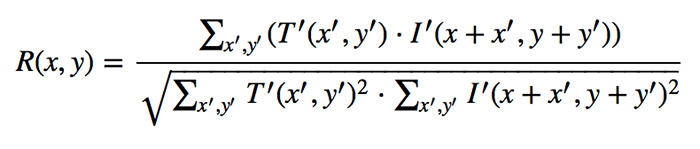

In OpenCV, it is implemented using ``cv2.matchTemplate``

> Matching methods available in OpenCV:
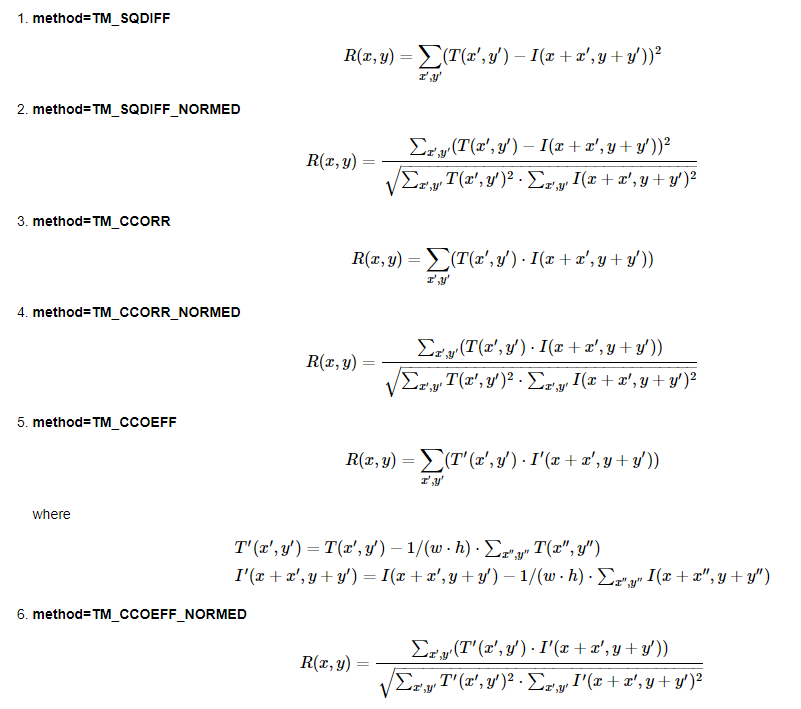

### Code for Template Matching

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline




# Face Detection

## Using CascadeClassifier of OpenCV

In [11]:
import cv2

# Load the pre-trained face cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Open the default camera (index 0)
cap = cv2.VideoCapture(0)

# Check if camera opened successfully
if not cap.isOpened():
    print("Cannot open camera")
    exit()

# Get the width and height of the captured frames
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Start an infinite loop to continuously capture frames
while True:
    # Read the current frame from the camera
    ret, frame = cap.read()

    # If frame is not read correctly, break the loop
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Perform face detection
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Draw bounding boxes around detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Show the frame with detected faces
    cv2.imshow('Face Detection', frame)

    # If the 'q' key is pressed, break the loop and exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and destroy all windows
cap.release()
cv2.destroyAllWindows()


## Using DNN module for face detection

In [14]:
import cv2
import urllib.request
import numpy as np

# Download the pre-trained model files
model_url = 'https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt'
weights_url = 'https://github.com/opencv/opencv_3rdparty/raw/dnn_samples_face_detector_20180205_fp16/res10_300x300_ssd_iter_140000_fp16.caffemodel'

model_path = 'deploy.prototxt'
weights_path = 'res10_300x300_ssd_iter_140000_fp16.caffemodel'

# urllib.request.urlretrieve(model_url, model_path)
# urllib.request.urlretrieve(weights_url, weights_path)

# Load the pre-trained face detection model
net = cv2.dnn.readNetFromCaffe(model_path, weights_path)

# Open the default camera (index 0)
cap = cv2.VideoCapture(0)

# Check if camera opened successfully
if not cap.isOpened():
    print("Cannot open camera")
    exit()

# Get the width and height of the captured frames
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Start an infinite loop to continuously capture frames
while True:
    # Read the current frame from the camera
    ret, frame = cap.read()

    # If frame is not read correctly, break the loop
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    # Create a blob from the frame and perform face detection
    blob = cv2.dnn.blobFromImage(frame, 1.0, (300, 300), (104.0, 177.0, 123.0))
    net.setInput(blob)
    detections = net.forward()

    # Iterate over the detections and draw bounding boxes around faces
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.5:
            box = detections[0, 0, i, 3:7] * np.array([width, height, width, height])
            (startX, startY, endX, endY) = box.astype(int)
            cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 255, 0), 2)

    # Show the frame with detected faces
    cv2.imshow('Face Detection', frame)

    # If the 'q' key is pressed, break the loop and exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and destroy all windows
cap.release()
cv2.destroyAllWindows()